# The HFM library - A fast marching solver with adaptive stencils

## Part : Non holonomic metrics and curvature penalization
## Chapter : Five dimensional Reeds-Shepp models.

In this chapter we consider a generalized Reeds-Shepp model, posed on the five dimensional model 
\begin{equation*}
    \Omega = U \times \mathbb S^2,
\end{equation*}
where $U\subset \mathbb R^3$ is a box domain, and $\mathbb S^2\subset \mathbb R^3$ is the unit sphere. Elements of this configuration space thus combine a physical position $x \in U$, and an orientation defined by a unit vector $n \in \mathbb S^2$. 

The Reeds-Shepp model is non-holonomic, in other words some directions of motion are locally forbidden, and sub-Riemannian. The metric is obtained by letting, formally, $\varepsilon \to 0$ in the following expression
\begin{equation*}
    F_{(x,n)}(\dot x,\dot n)^2 := c(x,n)^2 \left(<n,\dot x>^2 +\varepsilon^{-2} \|n \times \dot x\|^2 + \xi^2 \|\dot n\|^2\right)
\end{equation*}
We denoted by $(x,n)\in \mathbb R^3 \times \mathbb S^2$ a point of the configuration space, and by $(\dot x,\dot n)$ a tangent vector at this point. Note that $<n,\dot n> = 0$, by construction of the unit sphere $\mathbb S^2$. The parameter $\xi>0$ balances the cost of motion in the physical and the angular spaces, in other words the amount of curvature penalization. Last, but not least, the term $\varepsilon^{-2} \|n \times \dot x\|^2$ strongly penalizes any physical motion that is not colinear with the current orientation $n$, and forbids such motion in the limit as $\varepsilon \to 0$.

In the HFM library, a small but positive relaxation parameter $\varepsilon>0$ is used.
In addition, the HFM library parametrizes the sphere manifold $\mathbb S^2$ using two Euler angles $\theta \in [0,\pi]$ and $\phi\in [0,2 \pi]$, as follows
\begin{equation*}
    n(\theta,\phi) = (\cos \theta, \sin \theta \cos \phi, \sin \theta \sin \phi),
\end{equation*}
with appropriate boundary conditions are used.

Since the Reeds-Shepp metric is insensitive to the orientation of the vector $n\in \mathbb S^2$, it makes sense to consider the projective manifold  $\mathbb P^2 = \mathbb S^2 / \{-1,1\}$. The same parametrization is used of $\mathbb P^2$ and $\mathbb S^2$, but the angle $\theta$ is restricted to the smaller interval $\theta \in [0,\pi/2]$ in the projective case. The main interest of the projective quotient is to avoid the need to take care of the orientation of the seed and the tips, and to cut computation time in half, see the similar experimiments conducted for curvature penalized planar paths.

The HFM library implements the above generalized Reeds-Shepp model, as well as two variants that are described in the next paragraph.
At the time of writing, however, the HFM library does *not* implement the higher dimensional counterparts of the Euler-Mumford elastica and the Dubins car models.

### The Reeds-Shepp *forward* variant 

This variant of the Reeds-Shepp model requires the physical velocity $\dot x$ to be *positively* colinear with the angular orientation $n$. A lower dimensional counterpart is also implemented in the HFM library, for curvature penalized planar paths. The metric of this model, strongly penalizes the negative part of their scalar product $<n,\dot x>$, so as to forbid motion in the reverse gear, in addition to lateral motion. More precisely
\begin{equation*}
    F_{(x,n)}(\dot x,\dot n)^2 := c(x,n)^2 \left(<n,\dot x>_+^2 +\varepsilon^{-2} <n,\dot x>_-^2 + \varepsilon^{-2} \|n \times \dot x\|^2 + \xi^2 \|\dot n\|^2\right).
\end{equation*}

### The Reeds-Shepp *dual* variant  

In this second variant of the Reeds-Shepp model, the physical velocity $\dot x$ must be *orthogonal* to the angular orientation $n$. The metric of this model penalizes the scalar product $<n,\dot x>^2$ by the factor $\varepsilon^{-2}$, in contrast with the original metric which instead penalizes the cross product $\|n \times \dot x\|^2$ in the classical model. More precisely 
\begin{equation*}
    F_{(x,n)}(\dot x,\dot n)^2 := c(x,n)^2 \left(\varepsilon^{-2} <n,\dot x>^2 + \|n \times \dot x\|^2 + \xi^2 \|\dot n\|^2\right).
\end{equation*}
This model promotes paths which are embedded in smooth surfaces, but are possibly non-smooth themselves. Interestingly, it is genuinely three dimensional. Indeed, lower dimensional counterpart of this model, on $\mathbb R^2 \times \mathbb S^1$, is equivalent to the standard Reeds-Shepp model, up to the change of coordinates $\theta \mapsto \theta + \pi/2$.

### Computation time

The numerical examples presented in this notebook involve solving 5-dimensional, highly anisotropic PDEs, using a non-parallellizable algorithm (Fast-Marching is a variant of Dijkstra's algorithm, which is inherently sequential).

As a result, computation times for these problems are not instantaneous. They are likely around a minute on a modern laptop. (Typically 30 to 40 seconds on the author's 2012 laptop equipped with a 2.7 Ghz processor.)

[**Summary**](Summary.ipynb) of volume Fast Marching Methods, this series of notebooks.

[**Main summary**](../Summary.ipynb) of the Adaptive Grid Discretizations 
	book of notebooks, including the other volumes.

# Table of contents
  * [1. The orientation space](#1.-The-orientation-space)
  * [2. Two paths to Rome](#2.-Two-paths-to-Rome)
    * [2.1 Defining the test case](#2.1-Defining-the-test-case)
    * [2.2 Extraction with isotropic fast marching](#2.2-Extraction-with-isotropic-fast-marching)
    * [2.3 The Reeds-Shepp model](#2.3-The-Reeds-Shepp-model)
    * [2.4 The Reeds-Shepp *dual* model](#2.4-The-Reeds-Shepp-*dual*-model)
    * [2.5 The Reeds-Shepp *forward* model](#2.5-The-Reeds-Shepp-*forward*-model)
    * [2.6 Stopping criteria based on Voronoi diagrams](#2.6-Stopping-criteria-based-on-Voronoi-diagrams)
  * [3. A motion planning example](#3.-A-motion-planning-example)
    * [3.1 Defining the domain.](#3.1-Defining-the-domain.)
    * [3.2 Isotropic fast marching](#3.2-Isotropic-fast-marching)
    * [3.3 The Reeds-Shepp model](#3.3-The-Reeds-Shepp-model)
    * [3.4 The Reeds-Shepp forward variant](#3.4-The-Reeds-Shepp-forward-variant)



This Python&reg; notebook is intended as documentation and testing for the [HamiltonFastMarching (HFM) library](https://github.com/mirebeau/HamiltonFastMarching), which also has interfaces to the Matlab&reg; and Mathematica&reg; languages. 
More information on the HFM library in the manuscript:
* Jean-Marie Mirebeau, Jorg Portegies, "Hamiltonian Fast Marching: A numerical solver for anisotropic and non-holonomic eikonal PDEs", 2019 [(link)](https://hal.archives-ouvertes.fr/hal-01778322)

Copyright Jean-Marie Mirebeau, University Paris-Sud, CNRS, University Paris-Saclay

## 0. Importing the required libraries

In [1]:
import sys; sys.path.insert(0,"..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('Curvature3','FMM'))

In [2]:
from agd import Eikonal
from agd.Plotting import savefig, SetTitle3D; #savefig.dirName = 'Figures/Curvature3/'

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Plots geodesics
import math

In [4]:
useMayavi = False
if useMayavi:
    from mayavi import mlab # Plots implicit surfaces

The functionality presented in this notebook for the CPU eikonal solver only. A different approach may be developed in the future to achieve similar functionality on the GPU.

## 1. The orientation space

The configuration space of the $(3+2)$-dimensional Reeds-Shepp models is more complex than those encountered in the previous experiments, since it involves the spherical manifold $\mathbb S^2$, or the projective plane $\mathbb P^2$.
The points of these manifolds are unit vectors, that we parametrize using the Euler angles $\theta$ and $\phi$ as follows.

In [5]:
def UnitVector(theta,phi): return np.array([np.cos(theta),np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi)])

We shall use $24$ points for discretizing the variable $\phi \in [0,2\pi]$. This number is kept small, so that computation times remain reasonable. In particular, it is notoriously less than the $60$ points or more used for discretizing the angular variable in the curvature penalized planar path models, which similarly belongs to the interval $[0,2 \pi]$. A side effect of this coarse discretization scale is that the relaxation parameter $\varepsilon$ involved in the Reeds-Shepp model cannot be too small : $\varepsilon = 0.2$ here, whereas $\varepsilon = 0.1$ previously.

In [6]:
nPhi=24

The same angular scale is used for discretizing both angles $\theta$ and $\phi$. Hence $n_\theta = n_\phi/2$ for discretizing the unit sphere $\mathbb S^2$, since $\theta\in [0,\pi]$. Similarly $n_\theta = n_\phi/4$ for discretizing the projective plane $\mathbb P^2$, since $\theta\in [0,\pi/2]$. The next two sets show the resulting collections of unit vectors.

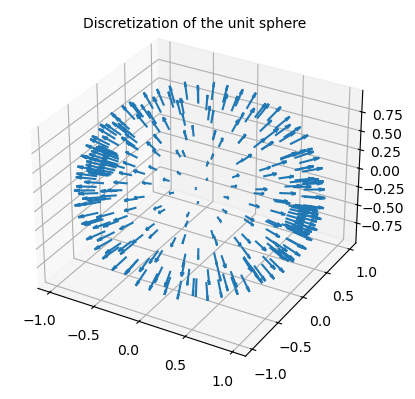

In [7]:
fig = plt.figure(); ax = plt.axes(projection='3d'); SetTitle3D(ax,"Discretization of the unit sphere")
normals = np.array([UnitVector(theta,phi) 
                    for theta in Eikonal.CenteredLinspace(0,np.pi,nPhi/2) 
                    for phi in np.linspace(0,2*np.pi,nPhi)]).T
ax.quiver(*normals,*normals, length=0.2);

In [8]:
savefig(fig,'Sampling_S2.png')

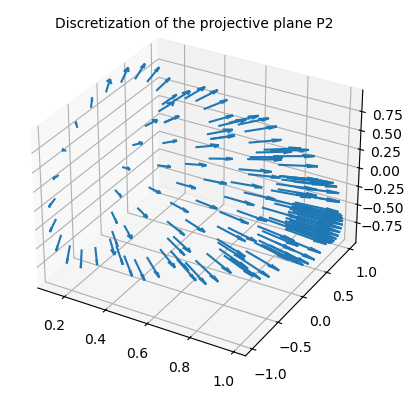

In [9]:
ax = plt.axes(projection='3d'); SetTitle3D(ax,"Discretization of the projective plane P2")
normals = np.array([UnitVector(theta,phi) 
                    for theta in Eikonal.CenteredLinspace(0,np.pi/2,nPhi/4) 
                    for phi in np.linspace(0,2*np.pi,nPhi)]).T
ax.quiver(*normals,*normals, length=0.2);

In [10]:
def EulerAngles(v):
    x,y,z = v
    theta = math.atan2(np.sqrt(y**2+z**2),x)
    phi = math.atan2(z,y)
    return theta, phi if phi>=0 else phi+2*np.pi

In [11]:
EulerAngles(0.1*UnitVector(1.9,4.1))

(1.9, 4.1)

## 2. Two paths to Rome

In this section, we define two curves in $\mathbb R^3$, both joining the point $(0,0,0)$ to the point $(\pi,0,0)$.
The first curve has low torsion, but a high curvature. The second curve has high torsion, but a more moderate curvature.

We then define a cost function $c : U \to ]0,\infty[$, where $U \subset \mathbb R^3$ is the physical domain, which favors paths staying close to the curves of interest. And finally, we compute the minimal geodesics joining the endpoints $(0,0,0)$ and $(\pi,0,0)$.

This example is inspired by applications to tubular structure segmentation. 
In such practical applications, for better efficiency, it should  however be preferable to the cost function on full configuration space $U \times \mathbb S^2$, so as to take advantage of available information on the curve orientation.

### 2.1 Defining the test case

In [12]:
def LowTorsionCurve(t): 
    return (t,np.sin(t)**2 *np.cos(4*t),0.1*t*(t-np.pi/2)*(np.pi-t))
def LowCurvatureCurve(t):
    return (t,np.sin(t)**3 *np.cos(2*t), np.sin(t)**3 *np.sin(2*t))

T = np.linspace(0,np.pi,200)
curvePoints = [LowTorsionCurve(T),LowCurvatureCurve(T)]

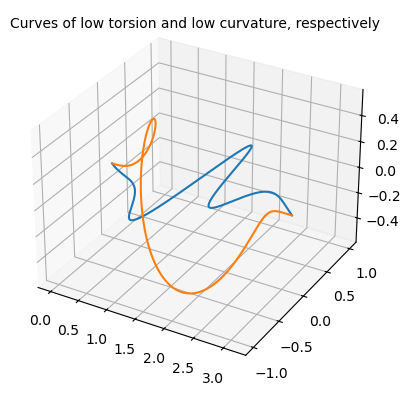

In [13]:
ax = plt.axes(projection='3d'); SetTitle3D(ax,"Curves of low torsion and low curvature, respectively")
for curve in curvePoints: ax.plot(*curve)

In the next cells, we compute the euclidean distance to the two curves of interest, using Isotropic fast marching. This is used afterwards to define the cost function of our synthetic example.

In [14]:
np.concatenate(curvePoints,axis=1).shape

(3, 400)

In [15]:
hfmIn = Eikonal.dictIn({
    'model':'Isotropic3',
    'seeds':np.concatenate(curvePoints,axis=1).T, # Seed position. Seed value defaults to 0.
    'cost':1,
    'exportValues':1, # Ask for the PDE solution, aka the euclidean distance to the curves
})
# Domain parameters 
hfmIn.SetRect(sides=[[-0.1,np.pi+0.1],[-1.1,1.1],[-0.7,0.7]],dimx=60)

In [16]:
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.019028 s.


The speed function used in further experiments is meant to favor paths staying close to the "low torsion" or the "low curvature" curves of interest. It is built from the distance to these curves, computed in this experiment. Recall that the *speed* and *cost* functions are equivalent to one another, with one being the inverse of the other.

In [17]:
speedCurves = np.maximum(1.,36*np.exp(-hfmOut['values']**2/0.15**2))

In [18]:
if useMayavi: 
    mlab.contour3d(speedCurves, contours=[12])
    mlab.view(azimuth=-50)
    mlab.show() 

This is what the previous command should display.
![curves neighborhood](https://dl.dropbox.com/s/no3i739d0j0z47r/A5_neigh.png?dl=0)

### 2.2 Extraction with isotropic fast marching

Before running Reeds-Shepp models, which are rather complex and costly, let us illustrate the principle of tubular structure segmentation with standard isotropic backtracking. 

In the next cell, we request the curve joining the $(0,0,0)$ and $(0,0,\pi)$ and minimizing cost. Equivalently, minimizing travel time given the input speed function.

In [19]:
hfmIn['seed']= [0,0,0]
hfmIn['tip'] = [np.pi,0,0]
hfmIn['speed'] = speedCurves; hfmIn.pop('cost') # Remove previous unit cost
hfmIn['exportValues']=0.

In [20]:
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.019459 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 10.985


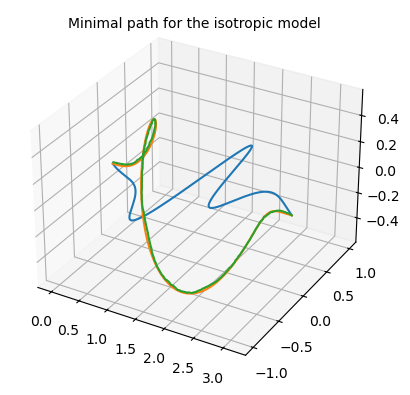

In [21]:
ax = plt.axes(projection='3d'); SetTitle3D(ax,"Minimal path for the isotropic model")
for curve in curvePoints: ax.plot(*curve)
ax.plot(*hfmOut['geodesic']);

The backtracked path is almost superposed over the "low curvature" curve. 
In the next cell, the seed and tip are moved a bit along the "low torsion" curve. As a result, the backtracked path now goes along this one instead.

In [22]:
hfmIn['seed']= LowTorsionCurve(0.4)
hfmIn['tip'] = LowTorsionCurve(np.pi-0.4)

In [23]:
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.019401 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 10.985


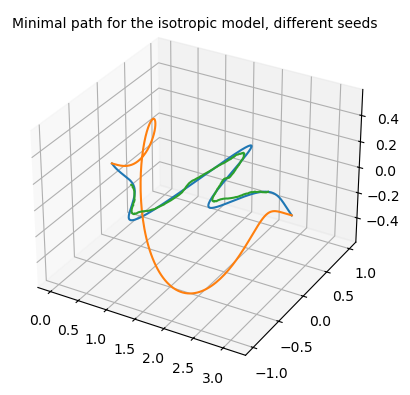

In [24]:
ax = plt.axes(projection='3d'); SetTitle3D(ax,"Minimal path for the isotropic model, different seeds")
for curve in curvePoints: ax.plot(*curve)
ax.plot(*hfmOut['geodesic']);

In [25]:
hfmIn.pop('seeds',None);
hfmIn.pop('tips',None);

### 2.3 The Reeds-Shepp model

We next compute the shortest sub-Riemannian geodesic, in the sense of the Reeds-Shepp model, joining the positions $x_0=(0,0,0)$ and $x_1=(0,0,\pi)$ of the physical domain $U$. 
These points are not members of the computational domain $U \times \mathbb S^2$, since they lack an orientation component. By defining $x_0$ and $x_1$ as *unoriented* seeds and tips, the HFM library will automatically select the orientations $n_0,n_1\in \mathbb S^2$ such that the sub-Riemannian distance from $(x_0,n_0)$ to $(x_1,n_1)$ is minimal, and return the corresponding geodesic.

In order to cut computation time in half, the next experiments rely on the projective orientation space $\mathbb P^2$ instead of the unit sphere $\mathbb S^2$.

In [26]:
hfmIn = Eikonal.dictIn({
    'model':'ReedsShepp3',
    'xi':1, # Curvature penalization parameter
    'dual':0, # Choose the standard Reeds-Shepp model, over the dual variant. (Default value = 0)
    'eps':0.2, # Relaxation parameter
    'projective':1, # Regard opposite orientations as equivalent. See below.
})
hfmIn.SetRect([[-0.1,np.pi+0.1],[-1.1,1.1],[-0.7,0.7]],dimx=60)
hfmIn.nTheta = nPhi # Conflicting conventions ...

The speed function considered in this experiment depends on the physical coordinates only: $s = s(x)$, where $x \in U \subset \mathbb R^3$. Also supported are constant: $s=s_0$, orientation dependent $s=s(\theta,\phi)$ where $\theta\in [0,\pi]$ and $\phi\in [0,2 \pi]$ are the Euler angles on the unit sphere $\mathbb S^2$ (or $\theta \in [0,\pi/2]$ in the projective case $\mathbb P^2$), and fully dependent $s=s(x,\theta,\phi)$ speed functions.

The speed function is provided as an array, or a single scalar in the constant case, and its dependency is inferred from the array dimension : 3 (physical dependency), 2 (angular dependency), or 5 (full dependency).

In  practical applications, for best performance, it is strongly advised to use fully dependent $s=s(x,\theta,\phi)$ speed functions, designed so as to promote motion tangentially to the tubular structures of interest.

In [27]:
hfmIn['speed']=speedCurves

Our objective is to extract a minimal geodesic from the seed point $(0,0,0)$ to the tip $(\pi,0,0)$ in $\mathbb R^3$, with any initial and final tangent.

In [28]:
hfmIn['seed_Unoriented']= [0,0,0]
hfmIn['tip_Unoriented'] = [np.pi,0,0]

In order to save CPU time, we end the front propagation as soon as the geodesic of interest can be backtracked. For that purpose, we use the `stopWhenAnyAccepted_Unoriented` termination criterion with the geodesic tip as output.

Another termination criterion is discussed at the end of this section.

In [29]:
hfmIn['stopWhenAllAccepted_Unoriented']=hfmIn['tips_Unoriented']

In [30]:
%%time
# Warning : may take up to a minute. 
hfmOut =hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Fast marching solver completed in 3.627 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 1.12 ms, sys: 3.81 ms, total: 4.93 ms
Wall time: 3.72 s


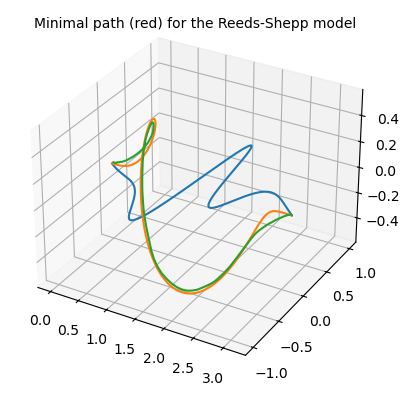

In [31]:
ax = plt.axes(projection='3d');  SetTitle3D(ax,"Minimal path (red) for the Reeds-Shepp model")
for curve in curvePoints: ax.plot(*curve)
ax.plot(*hfmOut['geodesic_Unoriented'][:3]);

The next cell illustrates the sub-Riemmannian constraint, namely that the collinearity of the physical velocity $\dot x$ with the current orientation $n$ is almost (due to the relaxation) satisfied.

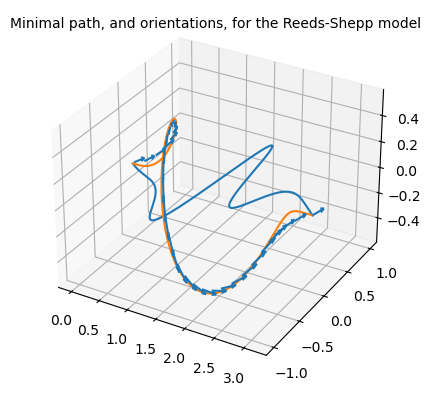

In [32]:
fig = plt.figure(); ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"Minimal path, and orientations, for the Reeds-Shepp model")
for curve in curvePoints: ax.plot(*curve)
geo = hfmOut['geodesic_Unoriented'][:,::10]
orientations = UnitVector(*geo[3:])
ax.quiver(*geo[:3], *orientations,length=0.2);

In [33]:
savefig(fig,'ReedsShepp_Tube_Tangents.png')

### 2.4 The Reeds-Shepp *dual* model

In the next experiment, the classical Reeds-Shepp model is replaced the a *dual* variant, which enforces a distinct sub-Riemannian constraint : the physical velocity $\dot x$ must be orthogonal with the orientation $n$.
This metric favors paths of low curvature, and paths which are embedded in smooth surfaces - in which case $n$ is expected to be close to the normal vector to the embedding surface.

In [34]:
hfmIn['dual'] = 1

In [35]:
# Warning : may take up to a minute.
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Fast marching solver completed in 4.04971 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647


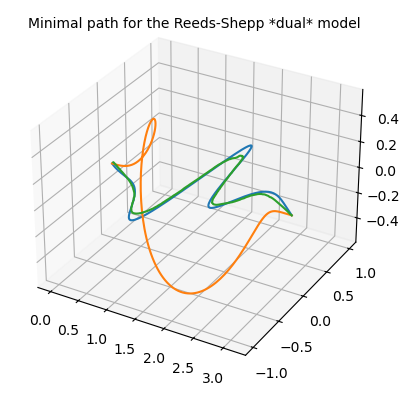

In [36]:
ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"Minimal path for the Reeds-Shepp *dual* model")
for curve in curvePoints: ax.plot(*curve)
ax.plot(*hfmOut['geodesic_Unoriented'][:3]);

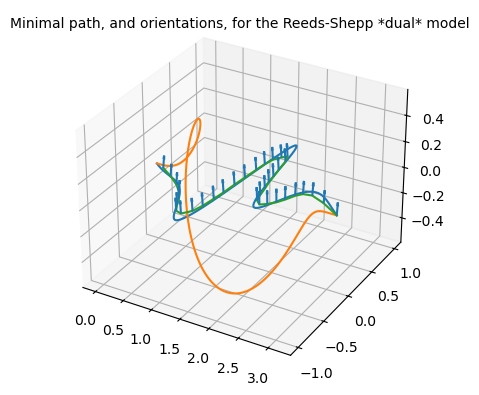

In [37]:
fig = plt.figure(); ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"Minimal path, and orientations, for the Reeds-Shepp *dual* model")
for curve in curvePoints: ax.plot(*curve)
geo = hfmOut['geodesic_Unoriented'][:,::8]
ax.plot(*geo[:3])
orientations = UnitVector(*geo[3:])
ax.quiver(*geo[:3],*orientations,length=0.1);

In [38]:
savefig(fig,'ReedsSheppDual_Tube_Tangents.png')

### 2.5 The Reeds-Shepp *forward* model

This model is perfectly applicable to tubular structure segmentation, and is in general preferable to the original sub-Riemannian Reeds-Shepp model. Indeed, the ability to move in reverse gear seems irrelevant for tubular structure segmentation. In addition, shifting from the front to the reverse gear, and conversely, it introduces a *cusp* which is usually regarded as an undesirable artifact. 

We refer to the next section for examples of such cusps, since they do not appear in the above experiment. In this test case, the results obtained with the Reeds-Shepp forward model are completely similar to those of the original sub-Riemannian model. Indeed, its main purpose is to eliminate cusps, which are not seen here.

In [39]:
hfmIn.pop('dual',None); # The forward model has no 'dual' counterpart
hfmIn.pop('projective',None); # The forward model has no 'projective' counterpart. Orientations must belong to S^2

In [40]:
hfmIn['model'] = 'ReedsSheppForward3'
hfmIn['dims'][3]=nPhi/2 # Discretization of S^2 requires (nPhi/2,nPhi), as opposed to P^2

In [41]:
%%time
# Warning : may take up to a minute.
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Fast marching solver completed in 2.40155 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 1.03 ms, sys: 4.02 ms, total: 5.05 ms
Wall time: 2.46 s


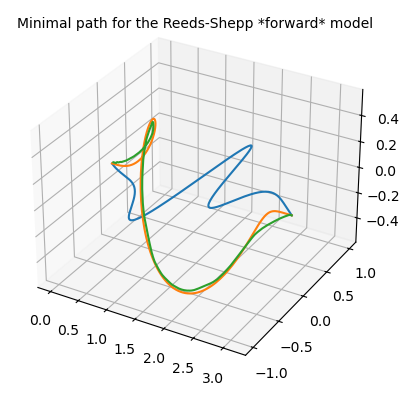

In [42]:
fig = plt.figure(); ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"Minimal path for the Reeds-Shepp *forward* model")
for curve in curvePoints: ax.plot(*curve)
ax.plot(*hfmOut['geodesic_Unoriented'][:3]);

### 2.6 Stopping criteria based on Voronoi diagrams

We end this section by illustrating another stopping criterion, based on Voronoi diagrams, applicable for fast geodesic computation in high dimensional domains. We continue the previous experiment, and recall that we use the Reeds-Shepp *forward* model, posed on $\mathbb R^3 \times \mathbb S^2$. We will not need any tips. 

In [43]:
hfmIn.pop('tips_Unoriented',None);
hfmIn.pop('stopWhenAllAccepted_Unoriented',None);

Instead, two (unoriented) seeds points are introduced. The HFM library is instructed to compute the corresponding Voronoi regions, and to stop the front propagation as soon as they contain points with similar physical position but opposite orientation. In other words of the form $(x,n)$ and $(x,-n)$ in $\mathbb R^3 \times \mathbb S^2$.

In [44]:
hfmIn['seeds_Unoriented'] = [[0,0,0],[np.pi,0,0]]
hfmIn['seedFlags_Unoriented'] = [0,1]
hfmIn['voronoiStoppingCriterion'] = 'OppositesMeeting'

In [45]:
%%time
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Fast marching solver completed in 1.52148 s.
Field exportVoronoiFlags defaults to 1
Field voronoiDiagram_exportGeodesicFromMeetingPoint defaults to 1
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 44 ms, sys: 42.7 ms, total: 86.6 ms
Wall time: 1.79 s


In [46]:
# The voronoi regions contain two points with opposite orientations.
print(hfmOut['voronoiDiagram_meetingPoint0'],'\n',hfmOut['voronoiDiagram_meetingPoint1'])

[ 1.59864293 -0.97463119  0.          1.17809725  4.71238898] 
 [ 1.59864293 -0.97463119  0.          1.96349541  1.57079633]


The minimal path joining the two seeds is obtained as the concatenation of the two minimal paths, from these meeting points to the seeds of the respective Voronoi regions.

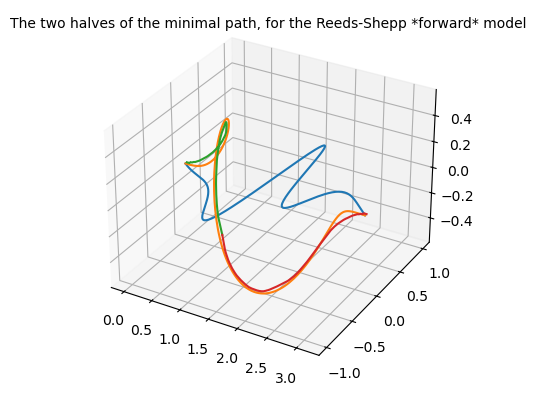

In [47]:
ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"The two halves of the minimal path, for the Reeds-Shepp *forward* model")
for curve in curvePoints: ax.plot(*curve)
for geo in hfmOut['geodesics_voronoiDiagram']: ax.plot(*geo[:3])

We next turn to the Reeds-Shepp model, instantiated in the projective space $\mathbb R^3 \times \mathbb P^2$. The previous stopping criterion does not apply, since $(x,n)$ and $(x,-n)$ both designate the same point in the projective space, hence they cannot belong to distinct Voronoi regions. Instead, the HFM library is instructed to stop the front propagation as soon as the two Voronoi regions contain points distant from one pixel in the cartesian discretization grid. For that purpose, we use the key `RegionsMeeting` instead of `OppositesMeeting`.

In [48]:
hfmIn['model'] = 'ReedsShepp3'
hfmIn['projective']=1
hfmIn['dims'][3] = nPhi/4
hfmIn['voronoiStoppingCriterion'] = 'RegionsMeeting'

In [49]:
%%time
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field dual defaults to 0
Field order defaults to 1
Fast marching solver completed in 2.59921 s.
Field exportVoronoiFlags defaults to 1
Field voronoiDiagram_exportGeodesicFromMeetingPoint defaults to 1
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 23.3 ms, sys: 33.7 ms, total: 57 ms
Wall time: 2.76 s


In [50]:
# The Voronoi regions contain two points separated by one pixel.
print(hfmOut['voronoiDiagram_meetingPoint0'],'\n',hfmOut['voronoiDiagram_meetingPoint1'])

[ 1.54294972 -0.97463119  0.05569321  1.17809725  4.71238898] 
 [ 1.54294972 -0.97463119  0.05569321  1.17809725  4.97418837]


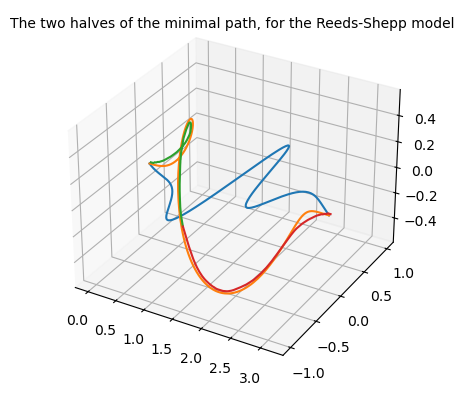

In [51]:
ax = plt.axes(projection='3d'); 
SetTitle3D(ax,"The two halves of the minimal path, for the Reeds-Shepp model")
for curve in curvePoints: ax.plot(*curve)
for geo in hfmOut['geodesics_voronoiDiagram']: ax.plot(*geo[:3])

## 3. A motion planning example 

We conclude this notebook by a motion planning example. By motion planning, we refer to the context where the cost function is constant $c=1$, but the domain features obstacles. 

The relevancy of the three dimensional Reeds-Shepp model for motion planning should not be over-emphasized, in contrast with applications to tubular structure segmentation where it is perfectly natural and efficient (given enough computation time). Indeed this model assumes a vehicle that:
* Can be oriented in any spatial direction $n \in \mathbb S^2$.
* Can move forward and backward in this direction.
* Can rotate in place.
* Is not sensitive to the roll angle, which is neglected in this model.

Perhaps some submarines, or spatial vehicles, can fit part of this description. Alternatively, some application specific models will need to be developed. The following experiment should only be regarded as the demonstration that  5 dimensional non-holonomic path planning is feasible.

### 3.1 Defining the domain.

We introduce a box domain, featuring a wall, with a hole, and a column. We also define a seed point, from which the front propagation is to be initiated, and a family of tips, from which minimal geodesics are to be backtraced.

In [52]:
# Let us construct a round shaped obstacle, and 1-pixel thick wall
X,Y,Z = np.mgrid[-1.5:1.5:60j, -0.5:1.5:40j, -0.625:0.625:25j]

column = (X-0.6)**2+(Y-0.7)**2 <= 0.4**2
floor = np.logical_and(np.logical_and(np.abs(Z)<0.05, Y>=0), (X+0.6)**2+(Y-0.7)**2 >= 0.3**2 )
obstacle = np.logical_or(column,floor)

In [53]:
physSeeds = np.array([ [0.,0.25,0.4] ])
physTips = np.array([ [x,y,z] 
            for x in Eikonal.CenteredLinspace(-1.5,1.5,4)
            for y in Eikonal.CenteredLinspace(-0.5,1.5,2)
            for z in Eikonal.CenteredLinspace(-0.625,0.625,2)
            ])

In [54]:
if useMayavi: 
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    mlab.points3d(physTips[:,0],physTips[:,1],physTips[:,2],color=(0,1,0),scale_factor=0.1)
    mlab.points3d(physSeeds[:,0],physSeeds[:,1],physSeeds[:,2],color=(1,0,1),scale_factor=0.1)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

Obstacles, seeds and tips, as displayed by the previous command.
![domain](https://dl.dropbox.com/s/s4kqppgm1h0phs6/A5_Planning_Domain.png?dl=0)

### 3.2 Isotropic fast marching

Using standard isotropic fast marching, we compute the shortest paths from the seed to the various tips, avoiding all obstacles.

In [55]:
physDims = [60,40,25] # Physical dimensions 
hfmIn = Eikonal.dictIn({
    'model':'Isotropic3',
    'dims':physDims,
    'gridScale':0.05,
    'origin':[-1.5,-0.5,-0.625],
    'cost':1,
    'walls':obstacle,
    'seeds':physSeeds,
    'tips':physTips,
})

In [56]:
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.015948 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 10.985


In [57]:
if useMayavi: # Set to true for mlab display (in external window)
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    for geo in GetGeodesics(hfmOutput):
        mlab.plot3d(*geo,tube_radius=0.01)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

Minimal paths and obstacles avoided, as displayed by the previous command.

Top | Bottom
:---:|:---:
![top view](https://dl.dropbox.com/s/xfsgmqboz5iu7g0/A5_Iso_Planning.png?dl=0) | ![bottom view](https://dl.dropbox.com/s/ojdcerrq1x0zqas/A5_Iso_Planning_Bottom.png?dl=0)

In [58]:
hfmIn.pop('seeds',None);
hfmIn.pop('tips',None);

### 3.3 The Reeds-Shepp model

In the next experiment, we extract minimal paths with respect to the Reeds-Shepp model. These paths are smoother than the previous minimal euclidean ones, due to the curvature penalization. They also have a distinctive feature: cusps, at the points where the vehicle shifts into reverse gear.

In [59]:
hfmIn.update({
    'model':'ReedsShepp3',
    'eps':0.15,
    'xi':1,
    'dual':0,
    'projective':1,
    'dims':np.concatenate((physDims,(nPhi/4,nPhi))),
    
    'seeds':[np.concatenate((p,EulerAngles([1,0,0]))) for p in physSeeds],
    'tips':[np.concatenate((p,EulerAngles([0,1,0]))) for p in physTips],
    'tips_Unoriented':physTips,
})

In [60]:
%%time
# Warning : may take up to a minute.
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 23.3574 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 1.91 ms, sys: 4.64 ms, total: 6.55 ms
Wall time: 24.2 s


In [61]:
if useMayavi:
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    for geo in GetGeodesics(hfmOutput):
        mlab.plot3d(geo[:,0],geo[:,1],geo[:,2],tube_radius=0.01)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

In [62]:
if useMayavi:
    for geo in GetGeodesics(hfmOutput):
        geo = geo[:,::8]
        mlab.quiver3d(*geo[:3], *UnitVector(geo[3:]))
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

Left: Minimal Reeds-Shepp paths and obstacles avoided. Right: verification that the sub-Riemannian colinearity constraint is correctly enforced, i.e. the orientations $n$ displayed as red arrows, are tangent to the curve, i.e. colinear with the physical velocity $\dot x$.

Paths and obstacles | Orientations
--- | ---
![paths](https://dl.dropbox.com/s/twhty44oxzd5l70/A5_RS_Planning_Top.png?dl=0) | ![arrows](https://dl.dropbox.com/s/s20y14pwuk2sge5/A5_RS_Planning_Arrows.png?dl=0)

In the next cell we display the minimal Reeds-Shepp geodesics backtracked from the unoriented seeds, thus with the most favorable initial direction.

In [63]:
if useMayavi:
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    for geo in GetGeodesics(hfmOutput,'Unoriented'):
        mlab.plot3d(*geo[:3],tube_radius=0.01)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

![unoriented](https://dl.dropbox.com/s/7rx45n7w8nfldoz/A5_RS_Planning_Unoriented.png?dl=0)

In [64]:
hfmIn.pop('tipsUnoriented',None);

The Reeds-Shepp *dual* variant is, at first sight, mostly irrelevant for motion planning. Nevertheless, we display the corresponding curves and orientations, to illustrate the fact that the model is genuinely different from the original Reeds-Shepp model, and that the sub-Riemannian constraint is correctly enforced. Namely orthogonality, instead of colinearity above, of the orientation $n \in \mathbb P^2$ with the physical velocity $\dot x \in \mathbb R^3$.

In [65]:
hfmIn['dual']=1

In [66]:
%%time
# Warning : may take up to a minute.
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 22.9798 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647
CPU times: user 1.7 ms, sys: 4.92 ms, total: 6.61 ms
Wall time: 23.6 s


In [67]:
if useMayavi:
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    for geo in GetGeodesics(hfmOutput):
        mlab.plot3d(*geo[:3],tube_radius=0.01)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

In [68]:
if useMayavi:
    for geo in GetGeodesics(hfmOutput):
        geo = geo[::8,:]
        mlab.quiver3d(geo[:3], UnitVector(geo[3:]))
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

Mayavi output for the Reeds-Shepp *dual* model.

Paths and obstacles | Orientation 
--- | ---
![paths](https://dl.dropbox.com/s/5ev4yzyz3i6lwds/A5_RSD_Planning_Top.png?dl=0) | ![arrows](https://dl.dropbox.com/s/ba7qe645ixg98xy/A5_RSD_Planning_Arrows.png?dl=0)

### 3.4 The Reeds-Shepp forward variant

The *forward* variant eliminates the reverse gear in the Reeds-Shepp model. 
The physical velocity $\dot x$ must be positively colinear with the orientation $n \in \mathbb S^2$.
As a result, cusps disappear in the extracted trajectories. A new phenomenon arises however, in particular at the curve endpoints and around obstacles: in place rotations, at which the orientation $n\in \mathbb  S^2$ changes, but the physical position $x \in U \subset \mathbb R^3$ remains constant.

In [69]:
hfmIn['model'] = 'ReedsSheppForward3'

hfmIn.pop('projective',None) # This model does not have a `projective variant': Orientations in S^2, not P^2.
hfmIn.pop('dual',None) 
hfmIn['dims'][3:5]=nPhi/2,nPhi # S^2 requires nPhi/2, nPhi

In [70]:
# Warning : may take up to a minute.
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 21.7914 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 18.5647


For some reason, mayavi will not plot a line if two consecutive elements are equal. This arises here, due to the *in place rotations* of the minimal curves. In other words, for some time, the geodesic physical position remains constant, while the angular orientation changes. For plotting, the angular part of the geodesic is removed, hence we are left with the physical part, which in constant in some time intervals.

For dealing with this issue, we introduce the following function. It deletes consecutive duplicates in an 2-dimensional array, regarded as a list of vectors.

In [71]:
from itertools import groupby
def DeleteConsecutiveDuplicates(L): 
    return np.array([x[0] for x in groupby(L, lambda x:tuple(x))])

In [72]:
if useMayavi:
    mlab.contour3d(X,Y,Z,obstacle.astype(float), contours=[0.15])
    for geo in GetGeodesics(hfmOutput):
         # Project to the physical space, and gather stationnary points.
        geo=DeleteConsecutiveDuplicates(geo[:3])
        mlab.plot3d(*geo,tube_radius=0.01)
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

In [73]:
if useMayavi:
    for geo in GetGeodesics(hfmOutput):
        geo = geo[:,::8]
        mlab.quiver3d(*geo[:3], *UnitVector(geo[3:]))
    mlab.view(azimuth=-60) #,elevation=120
    mlab.show()

Paths and obstacles | Orientations
--- | ---
![paths](https://dl.dropbox.com/s/g5btbghkvftpmvc/A5_RSF_Planning_Top.png?dl=0) | ![arrows](https://dl.dropbox.com/s/osh0uqheeujuit8/A5_RSF_Planning_Arrows.png?dl=0)